# Segmenting and Clustering Neighborhoods in Toronto

In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. 

Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,

In [1]:
#import libraries
import numpy as np #library to handle data in a vectorised manner
import pandas as pd #library for data analysis
import json #library to handle JSON files
!pip install geopy
from geopy.geocoders import Nominatim #convert an address into latitude and longitude values
import requests #library to handle requests
from pandas.io.json import json_normalize #transform JSON file into a pandas dataframe
#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans #import k-means from clustering stage
!pip install folium
import folium #map rendering library
!pip install lxml
!pip install html5lib
import urllib.request
!pip install geocoder
import geocoder
print('Libraries imported')

     |████████████████████████████████| 112kB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 13.5MB/s eta 0:00:01
     |████████████████████████████████| 102kB 23.0MB/s ta 0:00:01
     |████████████████████████████████| 92kB 26.4MB/s eta 0:00:01
     |████████████████████████████████| 829kB 36.4MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Libraries imported


In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',header=0)
for df in dfs:
    print(df)

    Postal code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                          Neighborhood  
0                                                  NaN  
1                                                  NaN  
2                                            Parkwoods  
3                                     Victoria Village  
4                           Regent Park / Harbourfront  
..                                                 ...  
175                                                NaN  
176                                                NaN  
177                                       

In [3]:
TorontoNeigh = dfs[0]

In [4]:
TorontoNeigh

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
...,...,...,...
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN
178,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...


Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [5]:
TorontoNeigh['Borough'].unique()

array(['Not assigned', 'North York', 'Downtown Toronto', 'Etobicoke',
       'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [6]:
#remove all the Boroughs that are not assigned
TorontoNeigh = TorontoNeigh[~TorontoNeigh.Borough.str.contains('Not assigned')]
TorontoNeigh = TorontoNeigh.reset_index(drop=True)
TorontoNeigh.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [7]:
TorontoNeigh.shape

(103, 3)

In [8]:
TorontoNeigh['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

Now we would like to replace the '/' with comma ',' in the Neighborhoods

In [9]:
# TorontoNeigh = TorontoNeigh.replace('/', ',', regex=True)
# TorontoNeigh.head()

In [10]:
TorontoNeigh['Neighborhood'] = TorontoNeigh['Neighborhood'].replace('/', ',', regex = True)
TorontoNeigh.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


Now that we have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

We are going to use the Geocoder package for this. First we will define the function and then we will loop and create the new dataframe that will contain Latitude and Longitude information

In [11]:
# define the geocoder function
def get_geocoder(postal_code_from_df):
    lat_lng_coords = None #initialise your variable to None
    #loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code_from_df))
        lat_lng_coords = g.latlng
    neigh_lat = lat_lng_coords[0]
    neigh_lng = lat_lng_coords[1]
    return neigh_lat, neigh_lng #this affects the order that it returns the value and the order in the next cell as well

In [12]:
#loop in our df and create a post_TorontoNeigh
post_TorontoNeigh = TorontoNeigh
post_TorontoNeigh['Latitude'], post_TorontoNeigh['Longitude'] = zip(*post_TorontoNeigh['Postal code'].apply(get_geocoder))
#The order of Latitude and Longitude column depends on how the function returns the output
post_TorontoNeigh.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.752935,-79.335641
1,M4A,North York,Victoria Village,43.728102,-79.311890
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.650964,-79.353041
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.723265,-79.451211
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.661790,-79.389390


Now the dataframe is created! Lets first visualise the data with folium so we can decide which area of Toronto we will explore and get the data from the Foursquare API.

In [13]:
#in order to define an instance of the geocoder, we need to define a user_agent
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [14]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location = [latitude, longitude], zoom_start= 10) #create map of New York using latitude and longitude values
#add markers to map
for lat, lng, borough, neighborhood, postal_code in zip(post_TorontoNeigh['Latitude'], post_TorontoNeigh['Longitude'], post_TorontoNeigh['Borough'], post_TorontoNeigh['Neighborhood'], post_TorontoNeigh['Postal code']):
    label = '{}, {}, {}'.format(neighborhood, borough, postal_code)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity=0.7,
        parse_html = False).add_to(map_toronto)
    
map_toronto

## 2. Explore Neighborhoods in City of Toronto

Lets simplify the above map and segment and cluster only the neighbirhoods in Toronto (include the word Toronto in their Borough Name eg. Downtown Toronto etc)

In [15]:
cityToronto_data = post_TorontoNeigh[post_TorontoNeigh['Borough'].str.contains('Toronto')].reset_index(drop = True)
cityToronto_data.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.650964,-79.353041
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.661790,-79.389390
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554
4,M4E,East Toronto,The Beaches,43.678148,-79.295349


We will use the same map that we have already created. Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them

In [1]:
# The code was removed by Watson Studio for sharing.

#### Let's explore neighborhoods in city of Toronto

In [17]:
#lets create a function
def getNearbyVenues(names, latitudes, longitudes, radius = 500, LIMIT = 100):
    venues_list = [] # create first an empty dataframe
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        #create API request url
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            lat,
            lng,
            VERSION,
            radius,
            LIMIT)
        #make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']

        #return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
        #create the dataframe
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [18]:
#now lets run the above function and create a new dataframe called toronto_venues
cityToronto_venues = getNearbyVenues(names = cityToronto_data['Neighborhood'],
                                  latitudes= cityToronto_data['Latitude'],
                                  longitudes=cityToronto_data['Longitude'])

Regent Park , Harbourfront
Queen's Park , Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond , Adelaide , King
Dufferin , Dovercourt Village
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
The Danforth West , Riverdale
Toronto Dominion Centre , Design Exchange
Brockton , Parkdale Village , Exhibition Place
India Bazaar , The Beaches West
Commerce Court , Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park , The Junction South
North Toronto West
The Annex , North Midtown , Yorkville
Parkdale , Roncesvalles
Davisville
University of Toronto , Harbord
Runnymede , Swansea
Moore Park , Summerhill East
Kensington Market , Chinatown , Grange Park
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Roseda

In [19]:
print(cityToronto_venues.shape)
cityToronto_venues.head()

(1595, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.650964,-79.353041,Souk Tabule,43.653756,-79.354390,Mediterranean Restaurant
1,"Regent Park , Harbourfront",43.650964,-79.353041,Young Centre for the Performing Arts,43.650825,-79.357593,Performing Arts Venue
2,"Regent Park , Harbourfront",43.650964,-79.353041,SOMA chocolatemaker,43.650622,-79.358127,Chocolate Shop
3,"Regent Park , Harbourfront",43.650964,-79.353041,BATLgrounds,43.647088,-79.351306,Athletics & Sports
4,"Regent Park , Harbourfront",43.650964,-79.353041,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant


#### Let's check how many venues were returned for each neighborhood

In [20]:
cityToronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,68,68,68,68,68,68
"Brockton , Parkdale Village , Exhibition Place",45,45,45,45,45,45
Business reply mail Processing CentrE,100,100,100,100,100,100
"CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport",65,65,65,65,65,65
Central Bay Street,52,52,52,52,52,52
Christie,12,12,12,12,12,12
Church and Wellesley,80,80,80,80,80,80
"Commerce Court , Victoria Hotel",100,100,100,100,100,100
Davisville,29,29,29,29,29,29


#### Let's find out how many unique categories can be curated from all the returned venues

In [21]:
print('There are {} uniques categories.'.format(len(cityToronto_venues['Venue Category'].unique())))

There are 219 uniques categories.


## 3. Analyze Each Neighborhood

In [22]:
cityToronto_onehot = pd.get_dummies(cityToronto_venues[['Venue Category']], prefix = '', prefix_sep='') #one hot encoding
cityToronto_onehot['Neighborhood'] = cityToronto_venues['Neighborhood'] # add neighborhood column back to dataframe
fixed_columns = [cityToronto_onehot.columns[-1]] + list(cityToronto_onehot.columns[:-1]) # move neighborhood column to the first column
cityToronto_onehot = cityToronto_onehot[fixed_columns]
cityToronto_onehot.head()

,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Lets examine the new shape
cityToronto_onehot.shape

(1595, 219)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
cityToronto_grouped = cityToronto_onehot.groupby('Neighborhood').mean().reset_index() # reset index exei 0,1 ,2 3 san index
cityToronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,Berczy Park,0.014706,0.000000,0.00,0.0,0.014706,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.014706,0.000000,0.000000,0.00,0.0
1,"Brockton , Parkdale Village , Exhibition Place",0.000000,0.022222,0.00,0.0,0.022222,0.000000,0.022222,0.000000,0.0,...,0.044444,0.022222,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0
2,Business reply mail Processing CentrE,0.000000,0.000000,0.03,0.0,0.010000,0.000000,0.000000,0.030000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.020000,0.000000,0.000000,0.01,0.0
3,"CN Tower , King and Spadina , Railway Lands , ...",0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.015385,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0
4,Central Bay Street,0.000000,0.000000,0.00,0.0,0.000000,0.019231,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.019231,0.019231,0.00,0.0


In [25]:
#lets confirm the new size
cityToronto_grouped.shape

(38, 219)

#### Let's print each neighborhood along with the top 5 most common venues

In [26]:
num_top_venues = 5

for hood in cityToronto_grouped['Neighborhood']:
    print('----'+hood+'----')
    temp = cityToronto_grouped[cityToronto_grouped['Neighborhood'] == hood].T.reset_index() #transpose
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.04
2  Seafood Restaurant  0.04
3         Cheese Shop  0.03
4              Lounge  0.03


----Brockton , Parkdale Village , Exhibition Place----
         venue  freq
0  Coffee Shop  0.09
1         Café  0.07
2        Diner  0.04
3  Pizza Place  0.04
4    Gift Shop  0.04


----Business reply mail Processing CentrE----
                 venue  freq
0          Coffee Shop  0.07
1                Hotel  0.05
2  Japanese Restaurant  0.04
3                 Café  0.04
4  American Restaurant  0.03


----CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport----
               venue  freq
0        Coffee Shop  0.08
1               Café  0.06
2         Restaurant  0.06
3               Park  0.05
4  French Restaurant  0.05


----Central Bay Street----
                       venue  freq
0                Coffee Shop  0.19
1                      

#### Let's put that into a *pandas* dataframe

In [27]:
#lets define a function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [28]:
num_top_venues = 10 #we can use any number but for simplification. It is not relevant to the num_top_venues above

indicators = ['st', 'nd', 'rd']

#create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
#create a new dataframe
cityTorontoNeigh_venues_sorted = pd.DataFrame(columns=columns)
cityTorontoNeigh_venues_sorted['Neighborhood'] = cityToronto_grouped['Neighborhood']

for ind in np.arange(cityToronto_grouped.shape[0]):
    cityTorontoNeigh_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cityToronto_grouped.iloc[ind, :], num_top_venues) #we have defined this function above

cityTorontoNeigh_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Seafood Restaurant,Cocktail Bar,Hotel,Farmers Market,Italian Restaurant,Bakery,Restaurant,Beer Bar,Lounge
1,"Brockton , Parkdale Village , Exhibition Place",Coffee Shop,Café,Pizza Place,Gift Shop,Thrift / Vintage Store,Diner,Boutique,Italian Restaurant,Brewery,Japanese Restaurant
2,Business reply mail Processing CentrE,Coffee Shop,Hotel,Café,Japanese Restaurant,American Restaurant,Restaurant,Asian Restaurant,Sandwich Place,Sushi Restaurant,Steakhouse
3,"CN Tower , King and Spadina , Railway Lands , ...",Coffee Shop,Café,Restaurant,Park,French Restaurant,Bar,Speakeasy,Lounge,Italian Restaurant,Gym / Fitness Center
4,Central Bay Street,Coffee Shop,Restaurant,Café,Sandwich Place,Middle Eastern Restaurant,Bubble Tea Shop,Breakfast Spot,Plaza,Clothing Store,Italian Restaurant


## 4. Cluster Neighborhoods

We are going to use KMeans to cluster the neighborhoods into clusters (we will also run to identify best k)

In [29]:
cityToronto_grouped_clustering = cityToronto_grouped.drop('Neighborhood', 1)

In [30]:
cityToronto_grouped_clustering.head()

,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0.014706,0.000000,0.00,0.0,0.014706,0.000000,0.000000,0.000000,0.0,0.014706,...,0.000000,0.000000,0.0,0.0,0.0,0.014706,0.000000,0.000000,0.00,0.0
1,0.000000,0.022222,0.00,0.0,0.022222,0.000000,0.022222,0.000000,0.0,0.000000,...,0.044444,0.022222,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0
2,0.000000,0.000000,0.03,0.0,0.010000,0.000000,0.000000,0.030000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.020000,0.000000,0.000000,0.01,0.0
3,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.015385,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0
4,0.000000,0.000000,0.00,0.0,0.000000,0.019231,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.019231,0.019231,0.00,0.0


## Normalise first our dataset

In [31]:
from sklearn.preprocessing import StandardScaler
cityToronto_grouped_clustering_norm = cityToronto_grouped_clustering.values[:,1:] #to not include the header
cityToronto_grouped_clustering_norm = StandardScaler().fit_transform(cityToronto_grouped_clustering_norm)
cityToronto_grouped_clustering_norm

array([[-0.16439899, -0.63192385, -0.16439899, ..., -0.33350151,
        -0.40094538, -0.16439899],
       [ 6.08276253, -0.63192385, -0.16439899, ..., -0.33350151,
        -0.40094538, -0.16439899],
       [-0.16439899,  1.41135444, -0.16439899, ..., -0.33350151,
         0.77084648, -0.16439899],
       ...,
       [-0.16439899, -0.63192385, -0.16439899, ..., -0.33350151,
        -0.40094538, -0.16439899],
       [-0.16439899,  1.41135444, -0.16439899, ..., -0.33350151,
         0.77084648, -0.16439899],
       [-0.16439899, -0.63192385, -0.16439899, ..., -0.33350151,
        -0.40094538, -0.16439899]])

In [32]:
cityToronto_grouped_clustering_norm.shape

(38, 217)

## Check k with Silhouette score

In [33]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(cityToronto_grouped_clustering_norm)
    labels = kmeans.labels_
    sil.append(silhouette_score(cityToronto_grouped_clustering_norm, labels, metric = 'euclidean'))

In [34]:
sil

[0.054399716785405165,
 0.04605761206251019,
 0.05689494216684063,
 0.07814794008789475,
 0.07849679474228757,
 0.04760190959720706,
 0.0532657424513867,
 0.05971513665987948,
 0.055994854818943916]

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

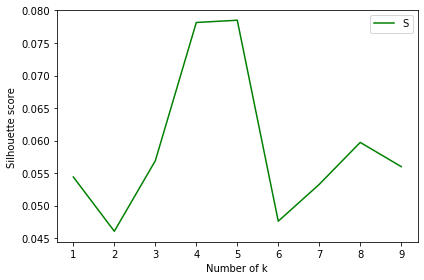

In [36]:
plt.plot(range(1,kmax),sil,'g')
plt.legend('Silhouette score')
plt.ylabel('Silhouette score ')
plt.xlabel('Number of k')
plt.tight_layout()
plt.show()

## So we choose k equals 5

In [37]:
kclusters = 5

#run kmeans clustering
kmeans = KMeans(n_clusters= kclusters, random_state= 0).fit(cityToronto_grouped_clustering_norm)
kmeans.labels_[0:10]

array([2, 1, 3, 1, 1, 3, 1, 2, 3, 3], dtype=int32)

### We should try at another attempt to find the optimal k with the elbow method

## Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [38]:
cityTorontoNeigh_venues_sorted.insert( 0, 'Cluster Labels', kmeans.labels_)

cityToronto_merged = cityToronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cityToronto_merged = cityToronto_merged.join(cityTorontoNeigh_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cityToronto_merged.head() # check the last columns!

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.650964,-79.353041,3.0,Pub,Café,Coffee Shop,Athletics & Sports,Performing Arts Venue,Tech Startup,Seafood Restaurant,Mexican Restaurant,Food Truck,French Restaurant
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.661790,-79.389390,3.0,Coffee Shop,Sushi Restaurant,Café,Bank,Burrito Place,Burger Joint,Middle Eastern Restaurant,Spa,Fried Chicken Joint,Bookstore
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529,0.0,Coffee Shop,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bar,Restaurant,Cosmetics Shop,Hotel,Café,Japanese Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554,3.0,Coffee Shop,Café,Seafood Restaurant,Italian Restaurant,American Restaurant,Gastropub,Cocktail Bar,Cosmetics Shop,Restaurant,Clothing Store
4,M4E,East Toronto,The Beaches,43.678148,-79.295349,3.0,Health Food Store,Trail,Pub,Church,Cupcake Shop,Dance Studio,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [39]:
cityToronto_merged['Cluster Labels'].value_counts()

3.0    24
1.0     7
2.0     5
4.0     1
0.0     1
Name: Cluster Labels, dtype: int64

### lets visualise the resulting clusters- I havent manage to make this work with the different colours yet

In [44]:
# # create a map
# map_clusters = folium.Map(location = [latitude, longitude], zoom_start= 11)

# #set colors scheme for clusters
# x = np.arange(kclusters)
# ys = [i + x + (i*x)**2 for i in range(kclusters)]

# #ys is a list which is made via for loop which runs till the value of kclusters and for each value of it will execute the equation i+x+(i+x)**2.
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys))) #np.linspace creates evenly gapped sequence between 0 to 1 , for length size. and cm.rainbow is used to make colormaps.
# rainbow = [colors.rgb2hex(i) for i in colors_array] #colors.rgb2hex converts numbers to colors.

# #add markers to the map
# markers_colors = []
# for lat, lng, poi, postal_code, cluster in zip(cityToronto_merged['Latitude'], cityToronto_merged['Longitude'], cityToronto_merged['Neighborhood'], cityToronto_merged['Postal code'], cityToronto_merged['Cluster Labels']):
#     label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html = True)
#     folium.CircleMarker(
#     [lat, lng],
#     radius = 5,
#     popup = label, 
#     color = rainbow[cluster-1],
#     fill = True,
#     fill_color = rainbow[cluster-1],
#     fill_opacity = 0.7).add_to(map_clusters)
    
# map_clusters

## 5. Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. Lets examine

In [41]:
#Cluster 1
cityToronto_merged.loc[cityToronto_merged['Cluster Labels'] == 0, cityToronto_merged.columns[[1]+ list(range(5, cityToronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,0.0,Coffee Shop,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bar,Restaurant,Cosmetics Shop,Hotel,Café,Japanese Restaurant


In [42]:
#Cluster 2
cityToronto_merged.loc[cityToronto_merged['Cluster Labels'] == 1, cityToronto_merged.columns[[1]+ list(range(5, cityToronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,1.0,Coffee Shop,Restaurant,Café,Sandwich Place,Middle Eastern Restaurant,Bubble Tea Shop,Breakfast Spot,Plaza,Clothing Store,Italian Restaurant
11,West Toronto,1.0,Restaurant,Bar,Cocktail Bar,Vietnamese Restaurant,Coffee Shop,Asian Restaurant,Wine Bar,Yoga Studio,Italian Restaurant,Japanese Restaurant
14,West Toronto,1.0,Coffee Shop,Café,Pizza Place,Gift Shop,Thrift / Vintage Store,Diner,Boutique,Italian Restaurant,Brewery,Japanese Restaurant
25,West Toronto,1.0,Coffee Shop,Bakery,Food & Drink Shop,Eastern European Restaurant,Restaurant,Bookstore,Sushi Restaurant,Thai Restaurant,Pizza Place,Gift Shop
27,Downtown Toronto,1.0,Café,Bookstore,Park,Restaurant,Japanese Restaurant,Italian Restaurant,Yoga Studio,Bakery,College Arts Building,Pub
32,Downtown Toronto,1.0,Coffee Shop,Café,Restaurant,Park,French Restaurant,Bar,Speakeasy,Lounge,Italian Restaurant,Gym / Fitness Center
37,Downtown Toronto,1.0,Coffee Shop,Japanese Restaurant,Restaurant,Sushi Restaurant,Gay Bar,Pub,Café,Dance Studio,Mediterranean Restaurant,Men's Store


In [43]:
#Cluster 3
cityToronto_merged.loc[cityToronto_merged['Cluster Labels'] == 2, cityToronto_merged.columns[[1]+ list(range(5, cityToronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Downtown Toronto,2.0,Coffee Shop,Seafood Restaurant,Cocktail Bar,Hotel,Farmers Market,Italian Restaurant,Bakery,Restaurant,Beer Bar,Lounge
8,Downtown Toronto,2.0,Coffee Shop,Café,Restaurant,Clothing Store,Sushi Restaurant,Thai Restaurant,Gym,Salad Place,Hotel,American Restaurant
13,Downtown Toronto,2.0,Coffee Shop,Hotel,Café,Restaurant,Japanese Restaurant,Seafood Restaurant,Salad Place,American Restaurant,Deli / Bodega,Tea Room
16,Downtown Toronto,2.0,Coffee Shop,Restaurant,Hotel,Italian Restaurant,Café,Japanese Restaurant,Seafood Restaurant,Gym,American Restaurant,Breakfast Spot
36,Downtown Toronto,2.0,Coffee Shop,Café,Hotel,Gym,American Restaurant,Japanese Restaurant,Restaurant,Deli / Bodega,Asian Restaurant,Seafood Restaurant


In [45]:
#Cluster 4
cityToronto_merged.loc[cityToronto_merged['Cluster Labels'] == 3, cityToronto_merged.columns[[1]+ list(range(5, cityToronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,3.0,Pub,Café,Coffee Shop,Athletics & Sports,Performing Arts Venue,Tech Startup,Seafood Restaurant,Mexican Restaurant,Food Truck,French Restaurant
1,Downtown Toronto,3.0,Coffee Shop,Sushi Restaurant,Café,Bank,Burrito Place,Burger Joint,Middle Eastern Restaurant,Spa,Fried Chicken Joint,Bookstore
3,Downtown Toronto,3.0,Coffee Shop,Café,Seafood Restaurant,Italian Restaurant,American Restaurant,Gastropub,Cocktail Bar,Cosmetics Shop,Restaurant,Clothing Store
4,East Toronto,3.0,Health Food Store,Trail,Pub,Church,Cupcake Shop,Dance Studio,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
7,Downtown Toronto,3.0,Café,Grocery Store,Athletics & Sports,Playground,Coffee Shop,Park,Candy Store,Baby Store,Farm,Electronics Store
9,West Toronto,3.0,Furniture / Home Store,Park,Pharmacy,Grocery Store,Brazilian Restaurant,Bank,Bakery,Athletics & Sports,Café,Gym
10,Downtown Toronto,3.0,Harbor / Marina,Farm,Park,Theme Park,Women's Store,Donut Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
12,East Toronto,3.0,Bus Line,Business Service,Grocery Store,Park,Discount Store,Women's Store,Eastern European Restaurant,Fish Market,Fish & Chips Shop,Fast Food Restaurant
15,East Toronto,3.0,Fast Food Restaurant,Gym,Italian Restaurant,Fish & Chips Shop,Pet Store,Liquor Store,Steakhouse,Sushi Restaurant,Sandwich Place,Movie Theater
17,East Toronto,3.0,Baseball Field,Business Service,Athletics & Sports,Government Building,Night Market,Women's Store,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [46]:
#Cluster 5
cityToronto_merged.loc[cityToronto_merged['Cluster Labels'] == 4, cityToronto_merged.columns[[1]+ list(range(5, cityToronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,West Toronto,4.0,Café,Pizza Place,Coffee Shop,Sushi Restaurant,Shoe Store,Gastropub,Pub,Italian Restaurant,Falafel Restaurant,Restaurant


I will work on how to have the different colours

In [63]:
# create a map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start= 11)

#set colors scheme for clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

#ys is a list which is made via for loop which runs till the value of kclusters and for each value of it will execute the equation i+x+(i+x)**2.
colors_array = cm.rainbow(np.linspace(0, 1, len(ys))) #np.linspace creates evenly gapped sequence between 0 to 1 , for length size. and cm.rainbow is used to make colormaps.
rainbow = [colors.rgb2hex(i) for i in colors_array] #colors.rgb2hex converts numbers to colors.

#add markers to the map
markers_colors = []
for lat, lng, poi, postal_code, cluster in zip(cityToronto_merged['Latitude'], cityToronto_merged['Longitude'], cityToronto_merged['Neighborhood'], cityToronto_merged['Postal code'], cityToronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html = True)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = label, 
    color = rainbow[2],
    fill = True,
    fill_color = rainbow[2],
    fill_opacity = 0.7).add_to(map_clusters)
    
map_clusters